In [1]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

w = np.random.random((output_features, input_features))
u = np.random.random((output_features, output_features))
b = np.random.random((output_features))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(w, input_t) + np.dot(u, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train_sequences')
print(len(input_test), 'test_sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape', input_train.shape)
print('input_test shape', input_test.shape)

25000 train_sequences
25000 test_sequences
Pad sequences (samples x time)
input_train shape (25000, 500)
input_test shape (25000, 500)


In [6]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 78ms/step - loss: 0.6051 - acc: 0.6575 - val_loss: 0.4808 - val_acc: 0.7736
Epoch 2/10
157/157 [==============================] - 12s 77ms/step - loss: 0.3797 - acc: 0.8432 - val_loss: 0.4046 - val_acc: 0.8190
Epoch 3/10
157/157 [==============================] - 12s 77ms/step - loss: 0.3097 - acc: 0.8752 - val_loss: 0.3596 - val_acc: 0.8442
Epoch 4/10
157/157 [==============================] - 12s 77ms/step - loss: 0.2549 - acc: 0.9024 - val_loss: 0.3950 - val_acc: 0.8322
Epoch 5/10
157/157 [==============================] - 12s 77ms/step - loss: 0.2014 - acc: 0.9252 - val_loss: 0.3589 - val_acc: 0.8642
Epoch 6/10
157/157 [==============================] - 12s 77ms/step - loss: 0.1549 - acc: 0.9441 - val_loss: 0.5016 - val_acc: 0.8480
Epoch 7/10
157/157 [==============================] - 12s 77ms/step - loss: 0.1141 - acc: 0.9596 - val_loss: 0.4264 - val_acc: 0.8364
Epoch 8/10
157/157 [==============================] - 12s 76ms

In [7]:
import matplotlib.pyplot as plt

def plot_acc_n_loss(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

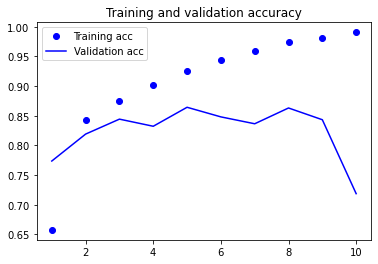

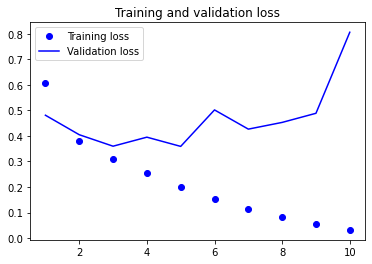

In [8]:
plot_acc_n_loss(history)

In [9]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 181ms/step - loss: 0.5218 - acc: 0.7502 - val_loss: 0.3593 - val_acc: 0.8628
Epoch 2/10
157/157 [==============================] - 28s 179ms/step - loss: 0.3070 - acc: 0.8790 - val_loss: 0.3266 - val_acc: 0.8634
Epoch 3/10
157/157 [==============================] - 27s 175ms/step - loss: 0.2423 - acc: 0.9079 - val_loss: 0.2788 - val_acc: 0.8920
Epoch 4/10
157/157 [==============================] - 27s 175ms/step - loss: 0.2009 - acc: 0.9264 - val_loss: 0.4282 - val_acc: 0.8550
Epoch 5/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1729 - acc: 0.9384 - val_loss: 0.3170 - val_acc: 0.8902
Epoch 6/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1548 - acc: 0.9438 - val_loss: 0.3308 - val_acc: 0.8850
Epoch 7/10
157/157 [==============================] - 27s 173ms/step - loss: 0.1430 - acc: 0.9491 - val_loss: 0.3377 - val_acc: 0.8864
Epoch 8/10
157/157 [==============================] - 2

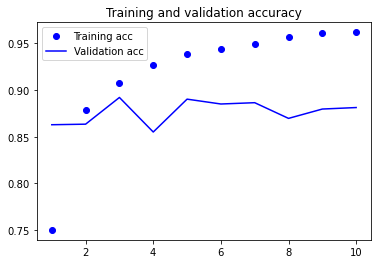

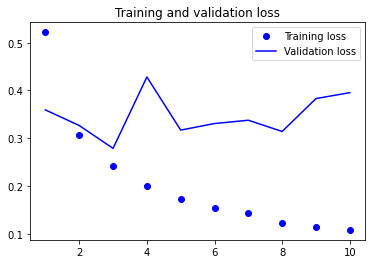

In [10]:
plot_acc_n_loss(history)

In [11]:
from tensorflow.keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train, 
                    epochs=10, batch_size=128, 
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 176ms/step - loss: 0.5575 - acc: 0.7136 - val_loss: 0.4606 - val_acc: 0.8116
Epoch 2/10
157/157 [==============================] - 27s 173ms/step - loss: 0.3423 - acc: 0.8554 - val_loss: 0.5882 - val_acc: 0.7524
Epoch 3/10
157/157 [==============================] - 28s 179ms/step - loss: 0.2651 - acc: 0.8947 - val_loss: 0.3449 - val_acc: 0.8486
Epoch 4/10
157/157 [==============================] - 28s 178ms/step - loss: 0.2222 - acc: 0.9147 - val_loss: 0.4256 - val_acc: 0.8176
Epoch 5/10
157/157 [==============================] - 28s 175ms/step - loss: 0.1958 - acc: 0.9270 - val_loss: 0.3916 - val_acc: 0.8586
Epoch 6/10
157/157 [==============================] - 27s 174ms/step - loss: 0.1738 - acc: 0.9360 - val_loss: 0.4880 - val_acc: 0.8272
Epoch 7/10
157/157 [==============================] - 28s 180ms/step - loss: 0.1543 - acc: 0.9433 - val_loss: 0.3308 - val_acc: 0.8892
Epoch 8/10
157/157 [==============================] - 2

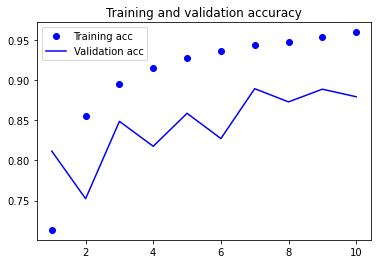

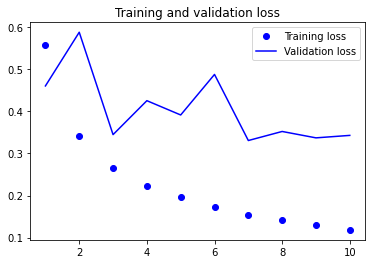

In [12]:
plot_acc_n_loss(history)